#### Importing libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn import svm

#### loading the csv

In [4]:
df_train = pd.read_csv('train(1).csv')

In [5]:
df_train.shape

(595212, 59)

In [6]:
df_train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [7]:
df_train.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [9]:
df_train.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          2
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


### 2.	Is the data balanced? Meaning are targets 0 and 1 in the right proportion? 

0    573518
1     21694
Name: target, dtype: int64


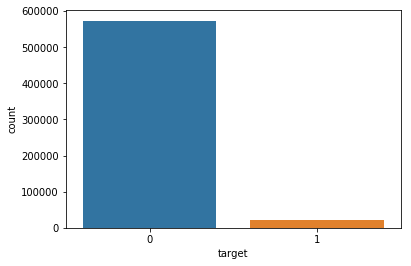

In [10]:
print(df_train.target.value_counts())
sns.countplot(df_train.target)

Data is highly imbalance with only ~3.8% of data belongs to minority (which is 1 in target) class. Need to do upscaling of lower class or down sampling of upper class after train-test split of data to get the desired results.
Generally it is upsampling of lower class data to avoid lossing on actual data by down sampling.

In [11]:
# This function gives the number of outliers in the columns and also returns the columns with outliers

def get_outlier(df):
    features = df.columns
    outliers  = []
    for i, feature in enumerate(features):
        if df[feature].dtype == 'float64':
            # Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(df[feature], 25)
            # Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(df[feature], 75)
            # Use the interquartile range to calculate an outlier step
            step = 1.5 * (Q3 - Q1)
            feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
            outliers.extend(list(feature_outliers.index.values))
            print('Feature Name: {}, No. of outliers: {}\n'.format(feature, len(feature_outliers.index)))
    
    multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    return multi_feature_outliers

### Missing value Analysis

In [12]:
df_train = df_train.replace(-1, np.nan)

In [13]:
train_missing = df_train.isnull().sum().sort_values(ascending=False)
train_missing = pd.DataFrame(train_missing).reset_index()
train_missing.columns = ['Feature', 'Number of Data Records Missing']
train_missing.head()

,Feature,Number of Data Records Missing
0,ps_car_03_cat,411231
1,ps_car_05_cat,266551
2,ps_reg_03,107772
3,ps_car_14,42620
4,ps_car_07_cat,11489


In [14]:
train_missing[train_missing['Number of Data Records Missing'] > 0].shape

(12, 2)

In [15]:
df_train.isnull().sum() > 0 

id                False
target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat     False
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

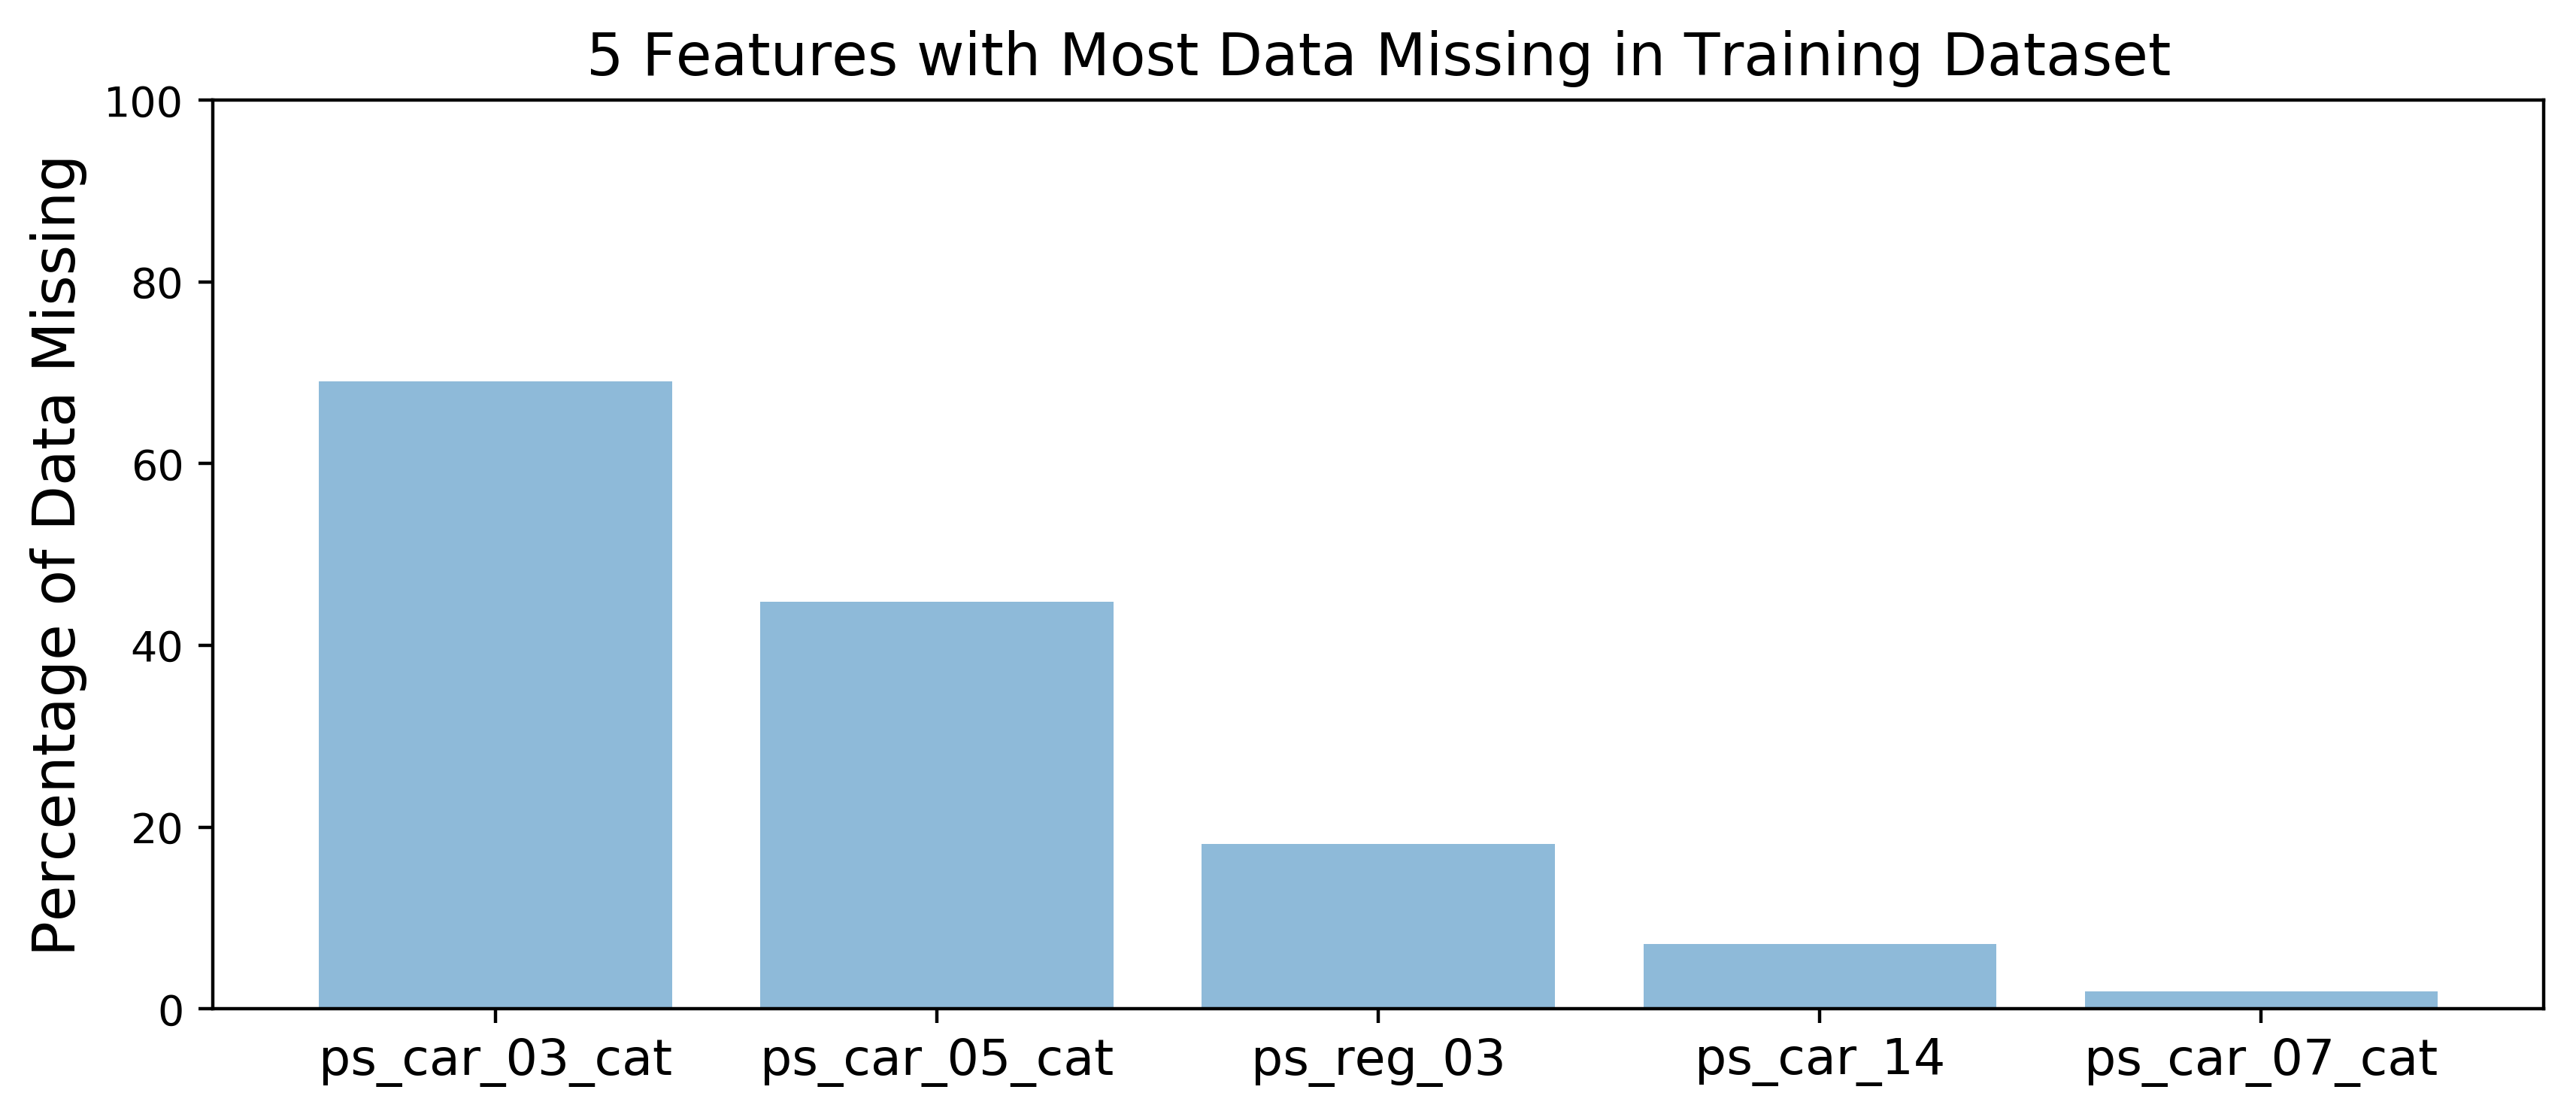

In [16]:
# Visualize the percentage of data missing
train_missingpercent = 100 * (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

plt.figure(figsize = (10, 4), dpi = 400)
plt.bar(np.arange(5), train_missingpercent[:5], align='center', alpha=0.5)
plt.xticks(np.arange(5), train_missingpercent.index[:5], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('5 Features with Most Data Missing in Training Dataset', fontsize = 14) 
plt.savefig('five_features.jpg')
plt.show()

### Drop Redundant Features & Replace Missing Data
#### Features 'ps_car_03_cat' and 'ps_car_05_cat' have more than 40% data missing, drop them.
#### Analyze the correlations of all remaining features, drop redundant features
#### Replace missing data in remaining features

In [17]:
# drop features 'ps_car_03_cat' and 'ps_car_05_cat'
df_train = df_train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)
#test = test.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

### Correlation Analysis

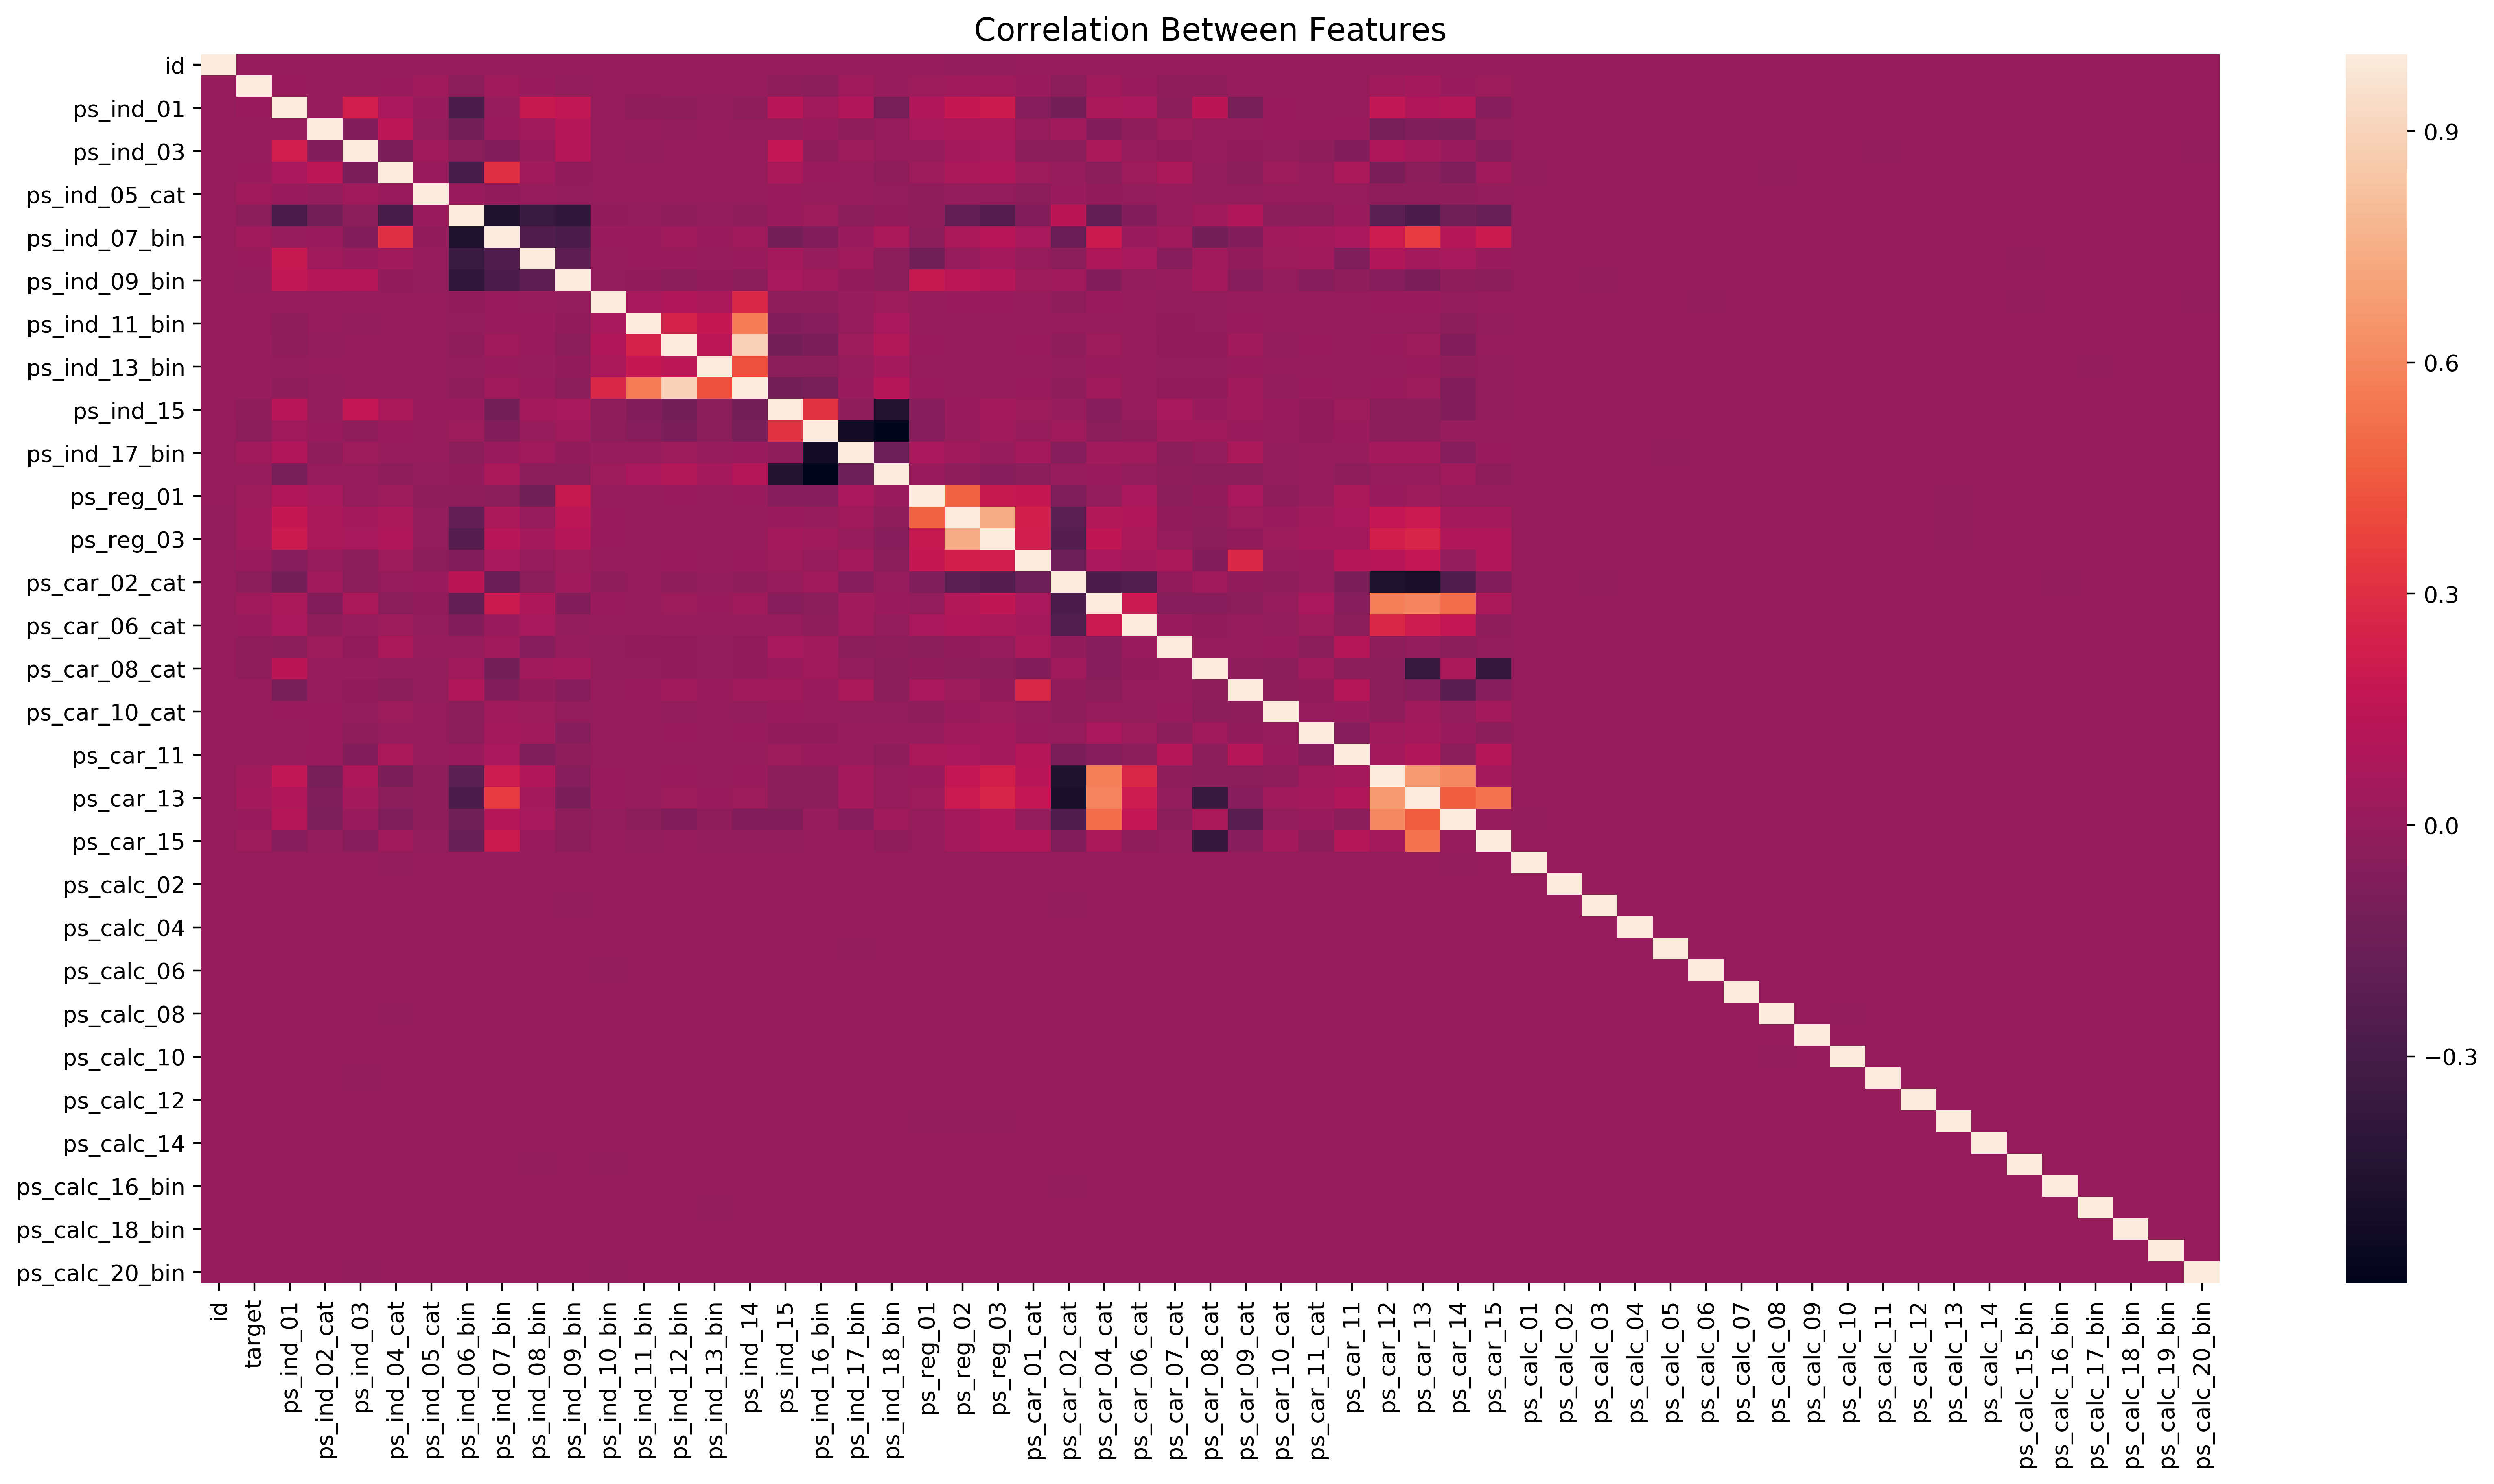

In [18]:
# visualize the correlation between remaining features
corr = df_train.corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

Features with calc in their names show little correlation with any other features in the training dataset. For dimensionality reduction, we should drop these features also.

In [19]:
# drop features with '_calc_' in feature names
feature_calc = list(df_train.columns[df_train.columns.str.contains('_calc_')])
print('Dropped calc columns--->', feature_calc)
df_train = df_train.drop(feature_calc, axis = 1)
#test = test.drop(feature_calc, axis = 1)

print(df_train.shape)
#print(test.shape)

Dropped calc columns---> ['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
(595212, 37)


In [20]:
cols = df_train.columns
non_BinCat_cols = []
bin_cols = []
cat_cols = []
for col in cols:
    if(col[-3:] == 'cat'):
        cat_cols.append(col)
    elif(col[-3:] == 'bin'):
        bin_cols.append(col)
    elif((col != 'id') & (col != 'target')):
        non_BinCat_cols.append(col)
print('bin cols: ', bin_cols)
print('cat cols: ', cat_cols)
print('non binary cat cols: ', non_BinCat_cols)

bin cols:  ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
cat cols:  ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
non binary cat cols:  ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']


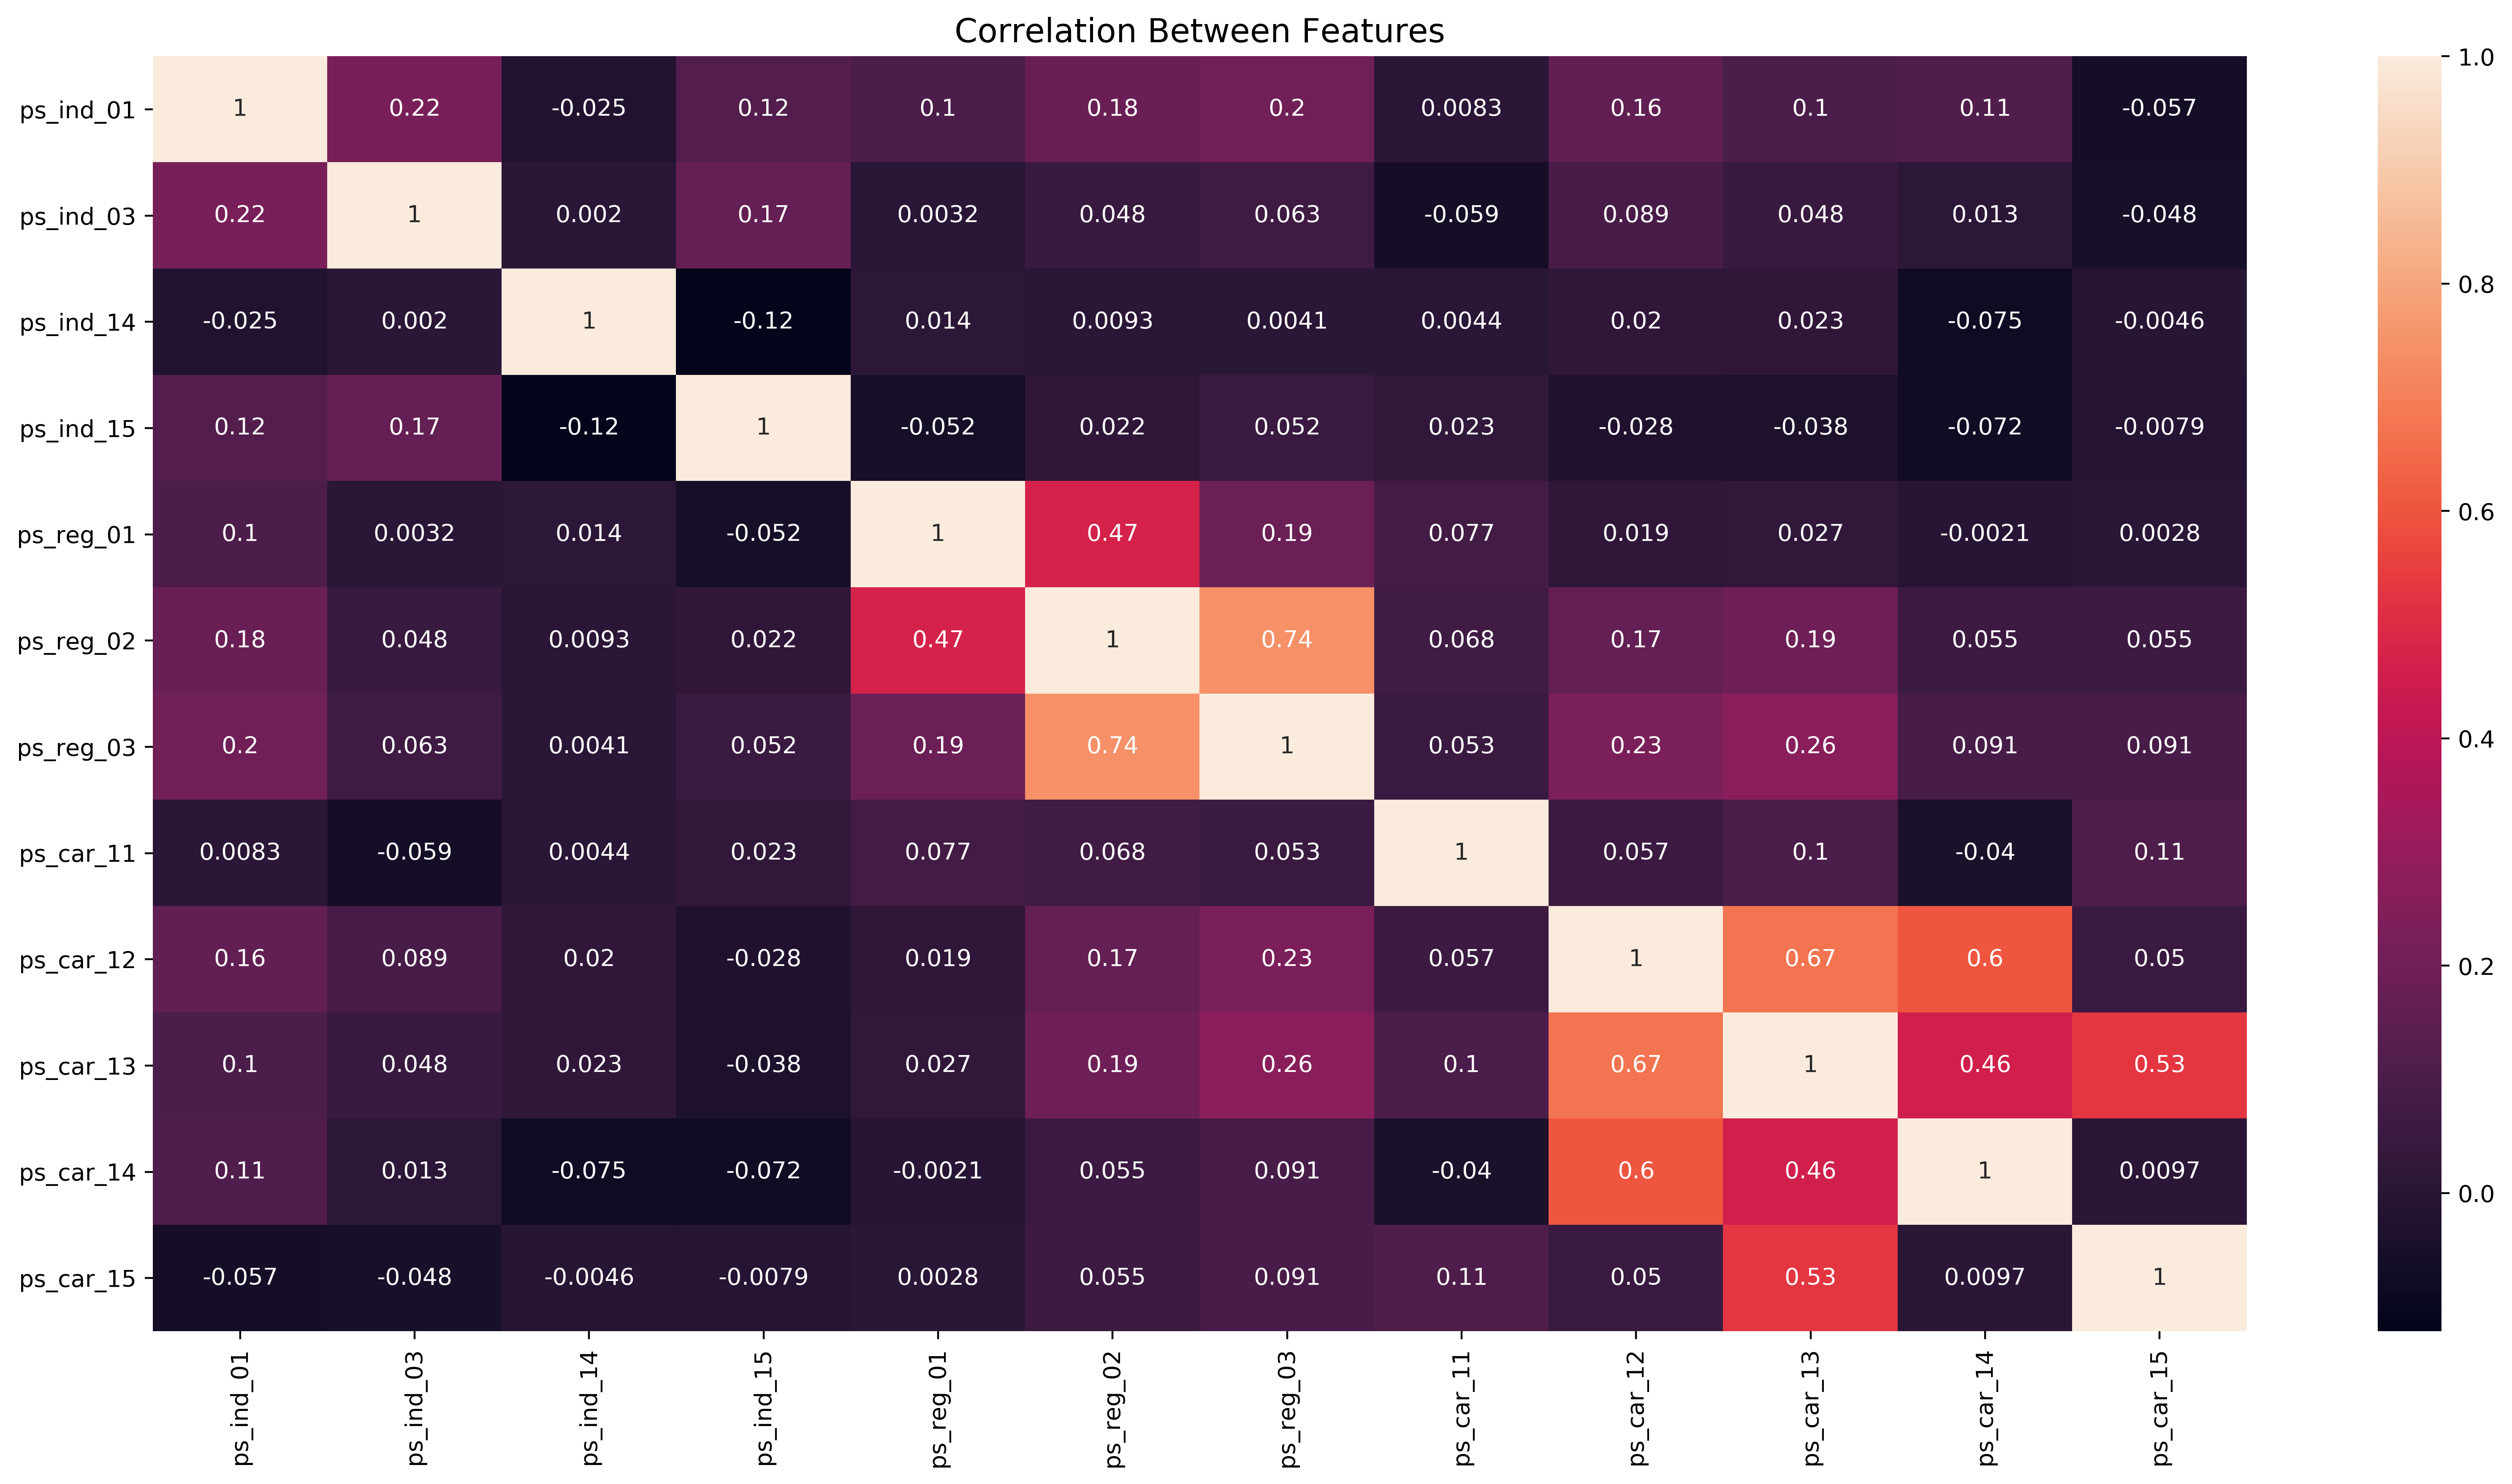

In [21]:
# visualize the correlation between non binary and non cat features
corr = df_train[non_BinCat_cols].corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr, annot=True)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

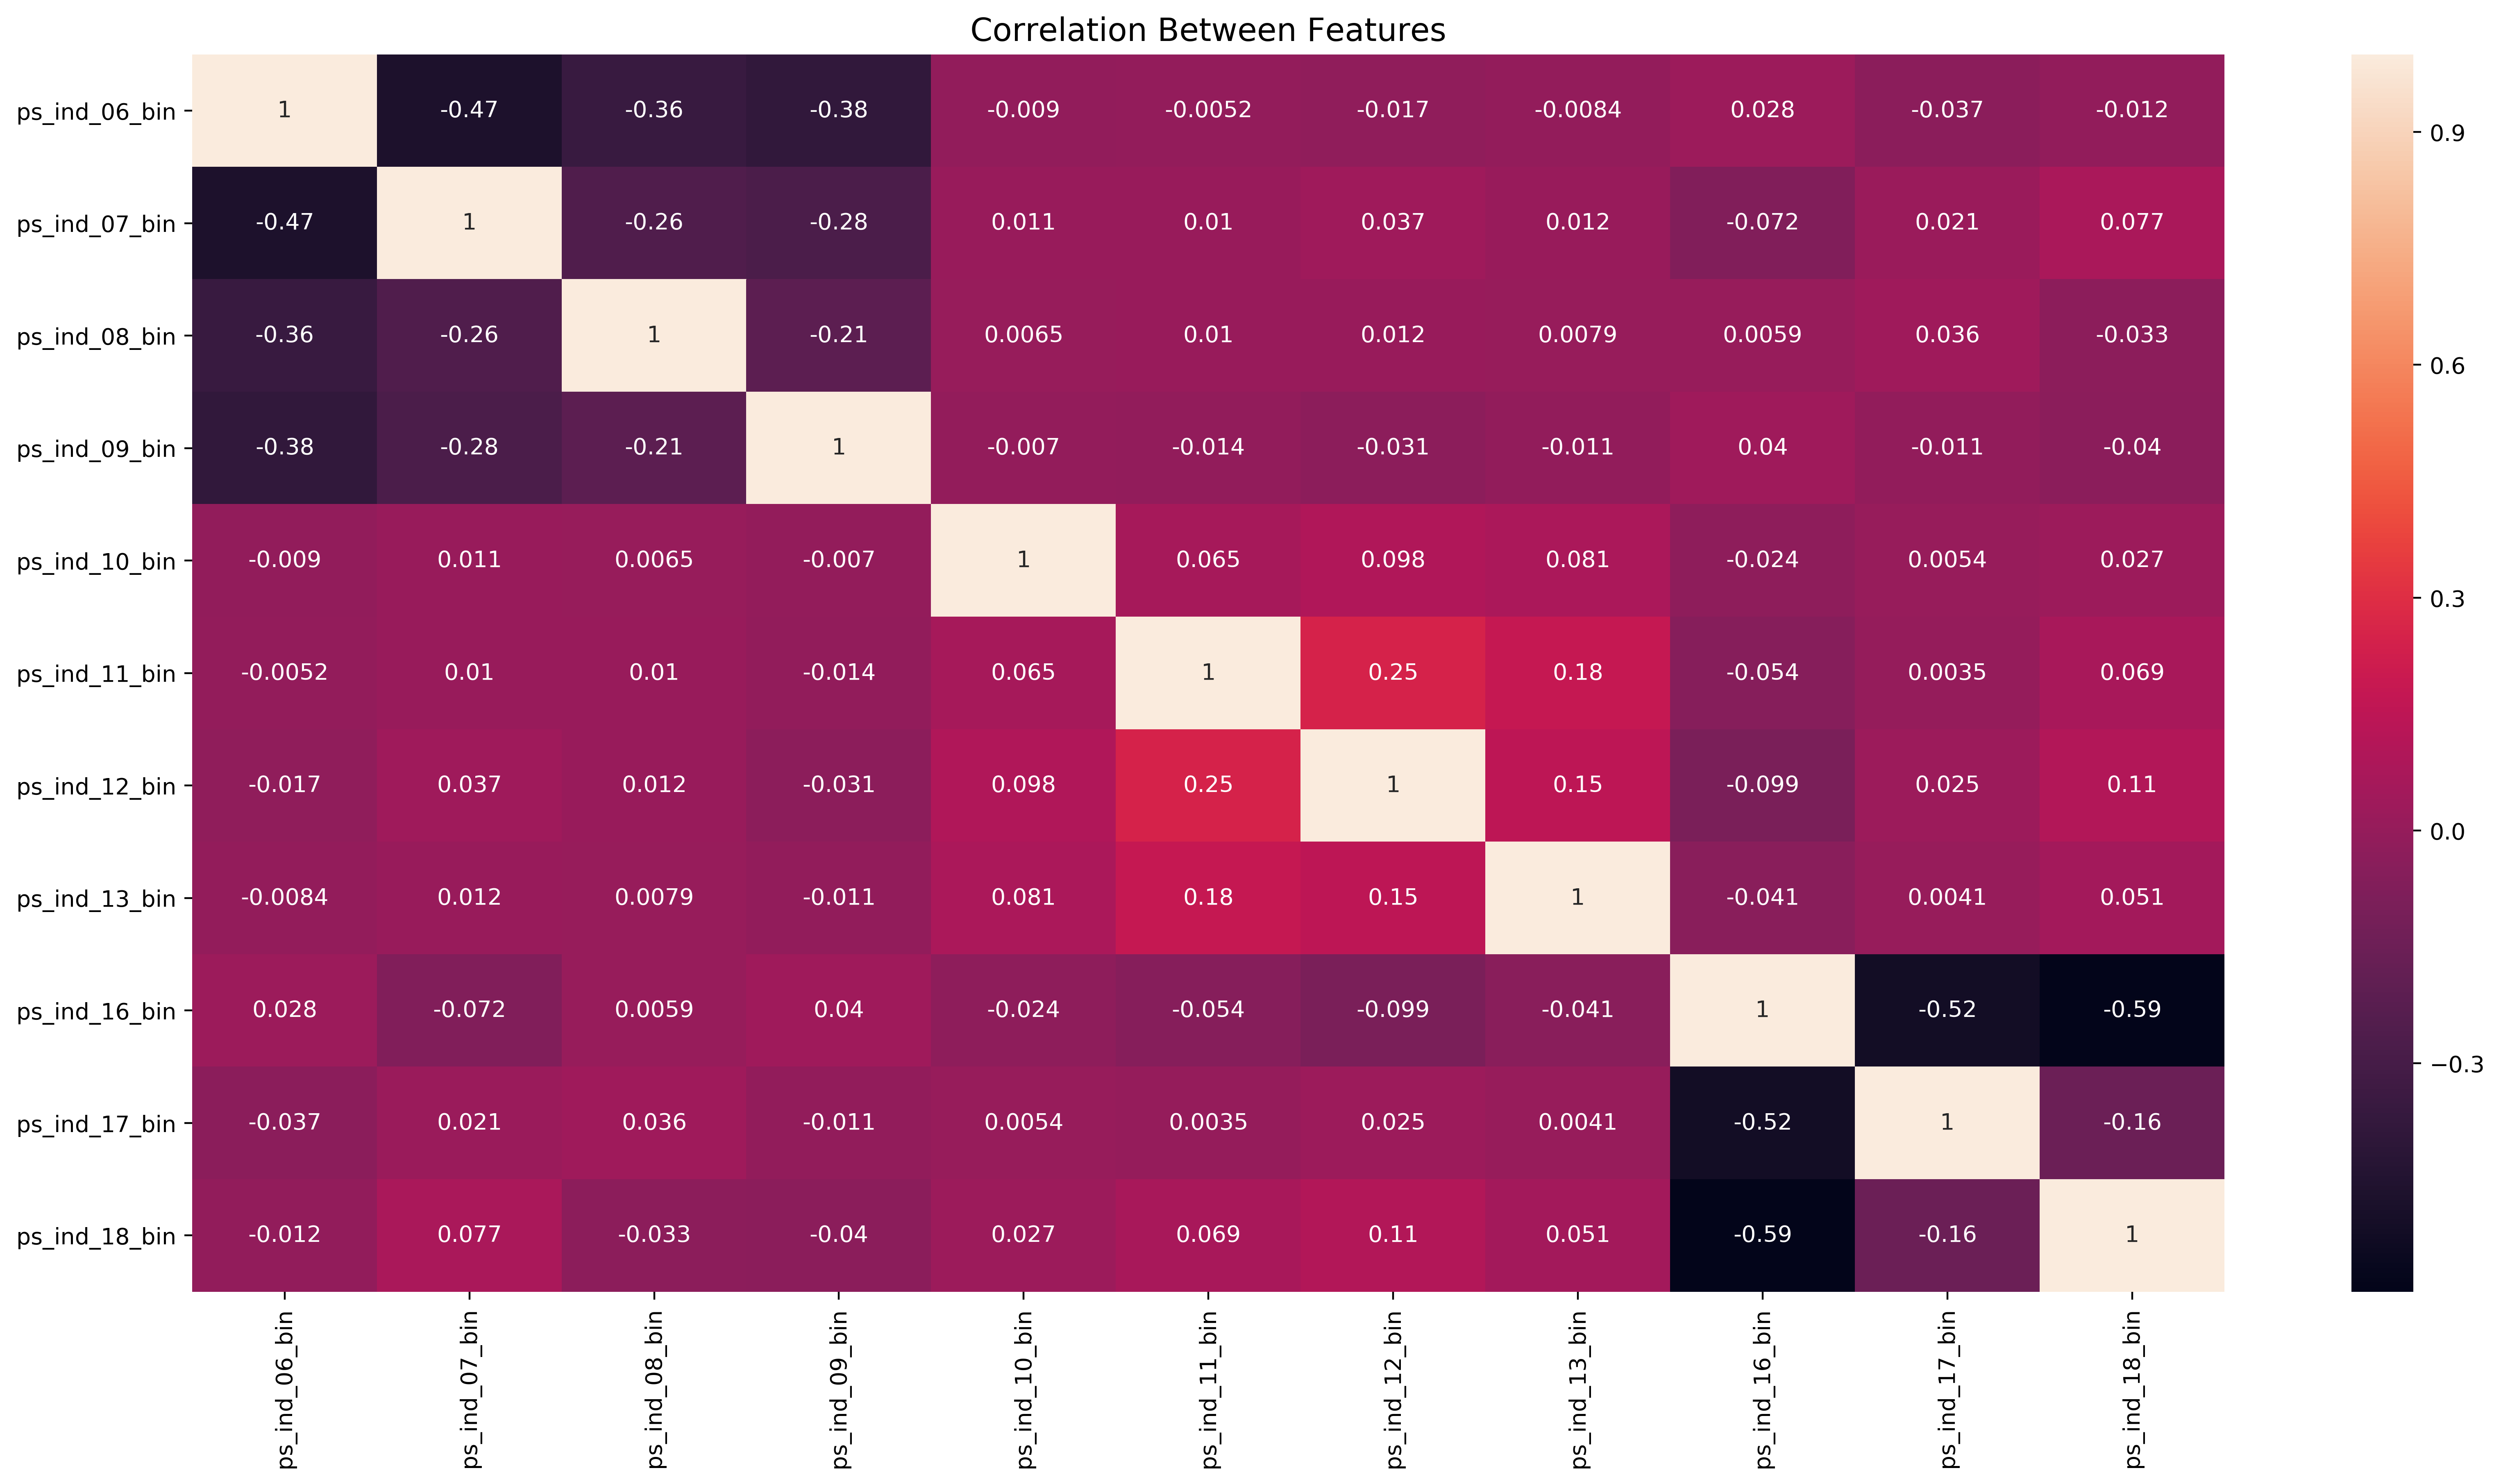

In [22]:
# visualize the correlation between bin features
corr = df_train[bin_cols].corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr, annot=True)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

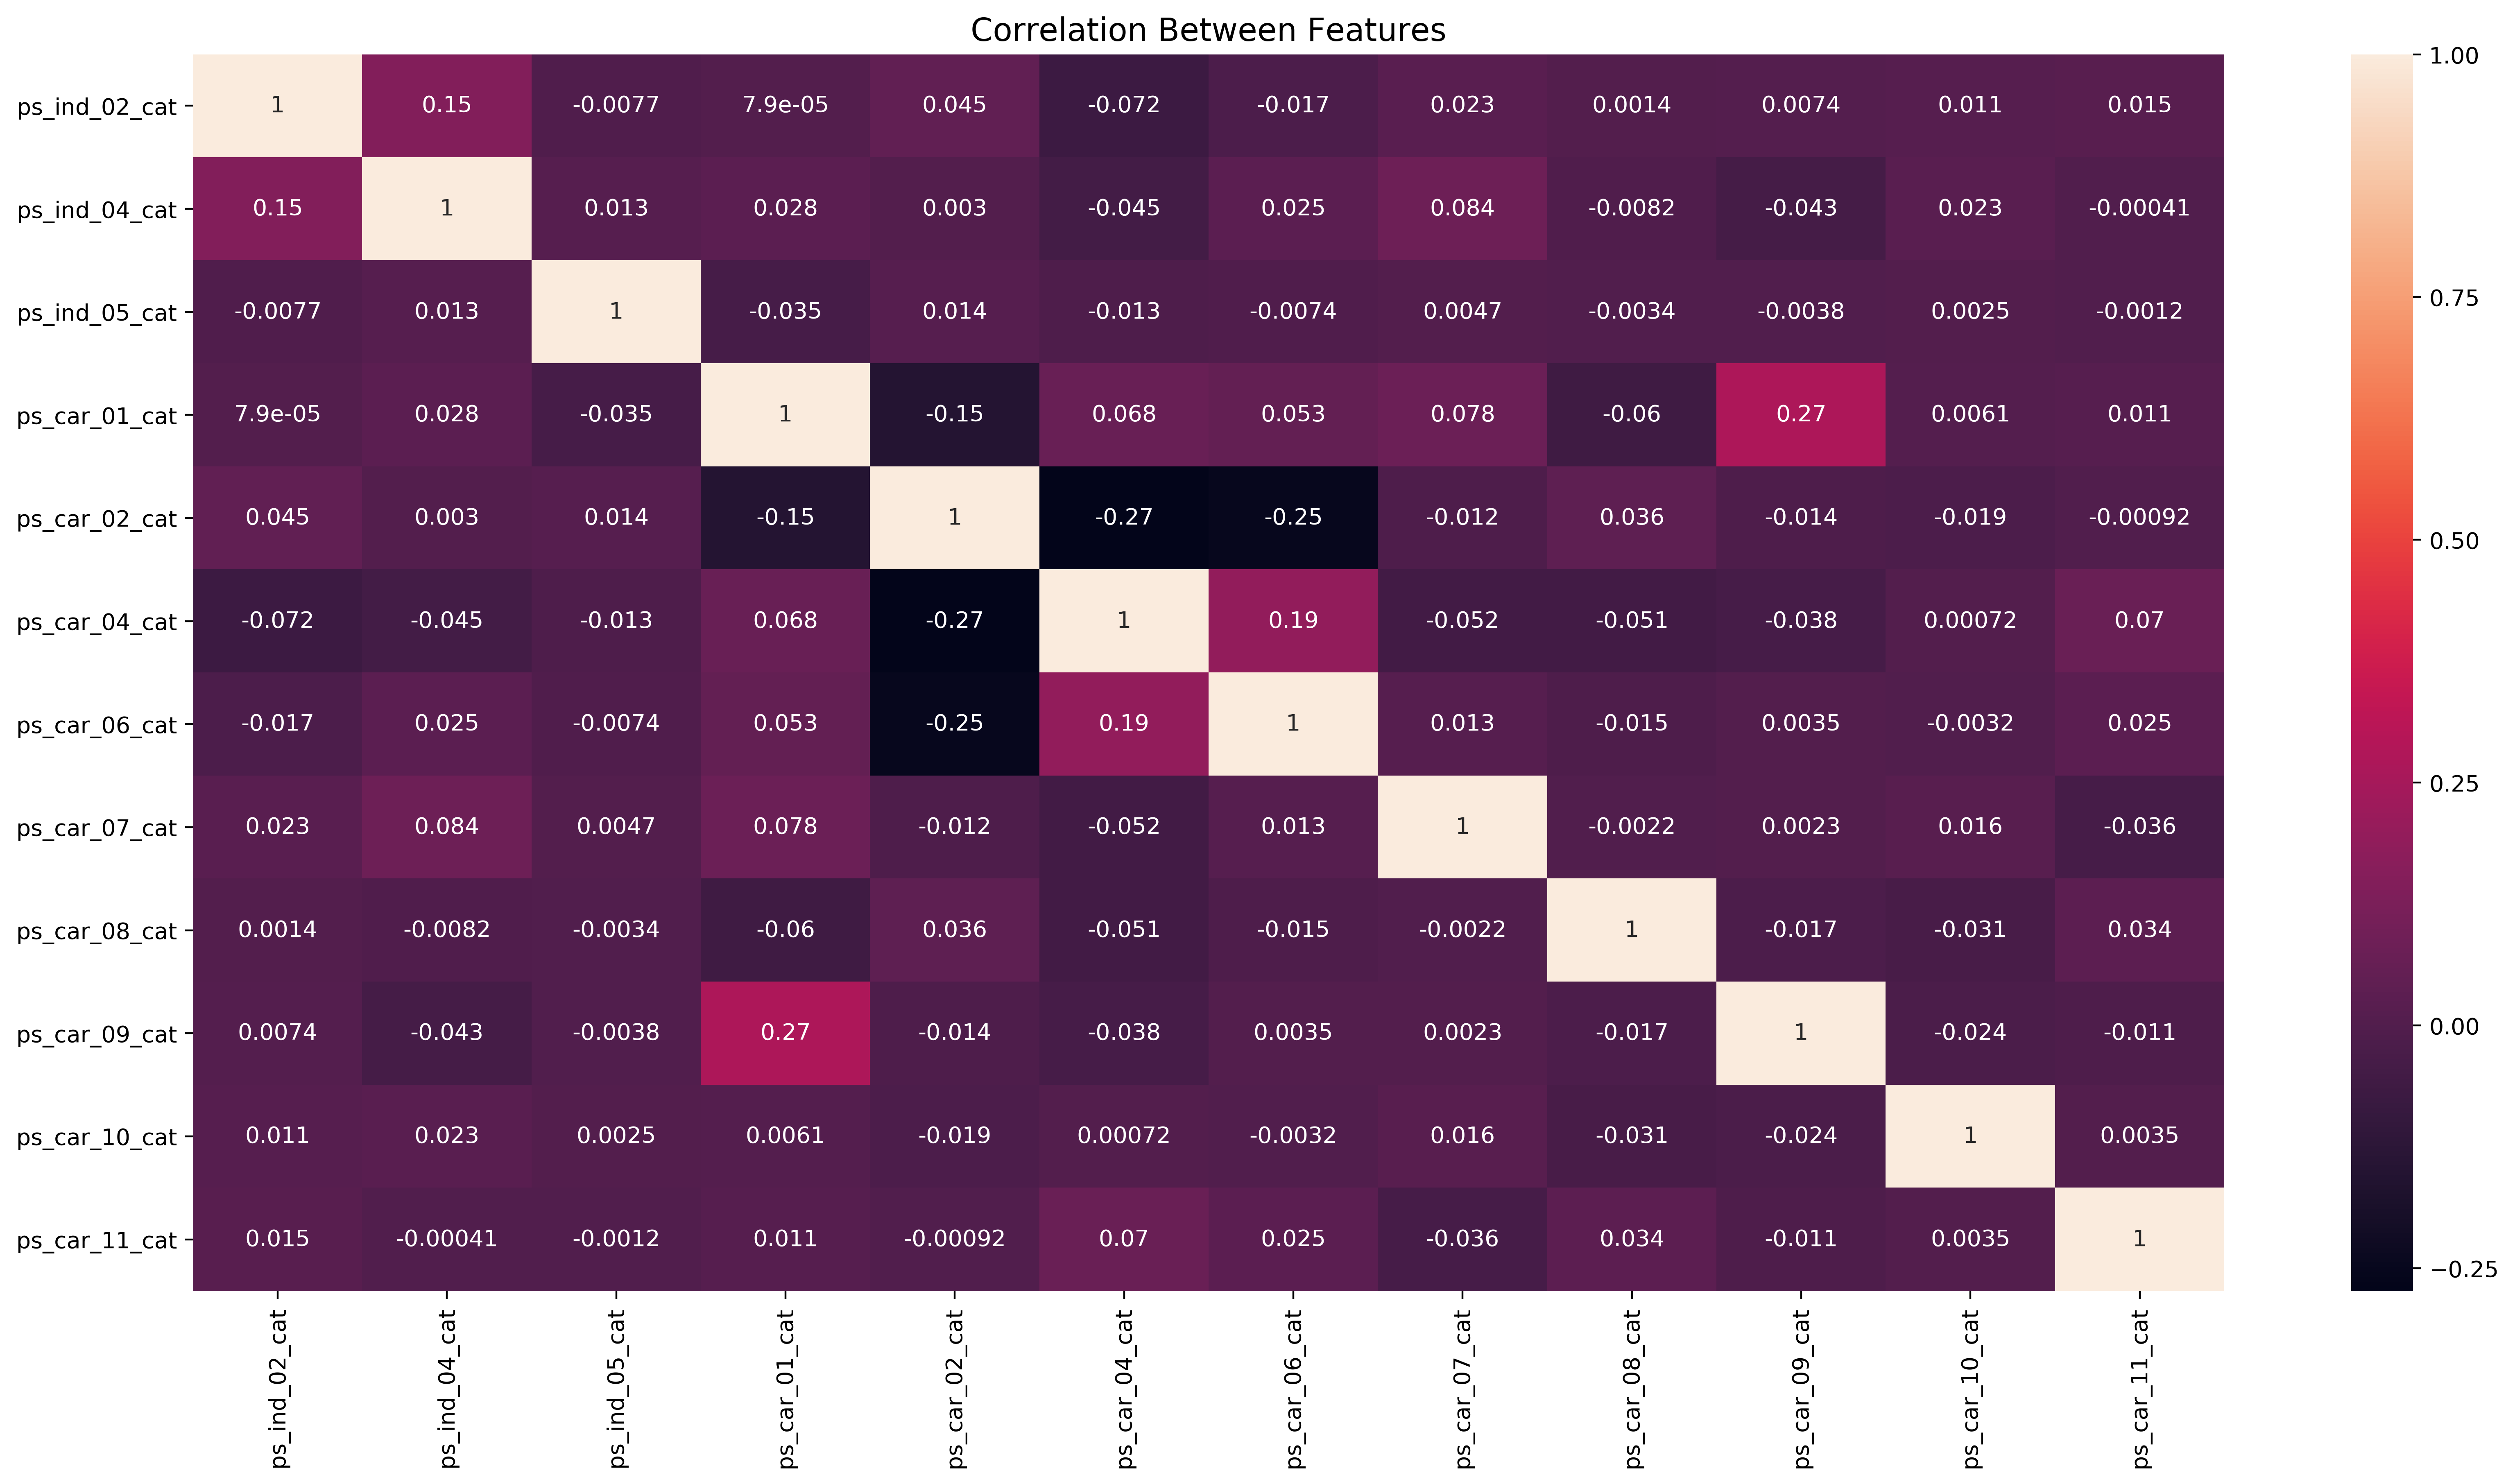

In [23]:
# visualize the correlation between cat features
corr = df_train[cat_cols].corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr, annot=True)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

### 	Which interval variables have strong correlation? 

Interval Variables: We can see the following variables are highly correlated 
-    ps_reg_01 and ps_reg_02 
-    ps_reg_02 and ps_reg_03

### What's the level of correlation among ordinal features? 

Ordinal Variables: Very few are correlated to each other(negligible)

### 	What steps should be taken to handle the missing data? 

Now replace the missing data in the remaining features:

For binary features (bin) and categorical features (cat), replace missing data with the most frequent value of the feature
For other features (continuous or ordinal), replace missing data with mean value of the feature

In [24]:
# replace missing data in the remaining features
feature_bin = [f for f in df_train.columns if f.endswith('bin')] 
feature_cat = [f for f in df_train.columns if f.endswith('cat')] 
feature_els = [f for f in df_train.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]

for f in (feature_bin + feature_cat):
    df_train[f].fillna(value=df_train[f].mode()[0], inplace=True)
    #test[f].fillna(value=test[f].mode()[0], inplace=True)
    
for f in feature_els:
    df_train[f].fillna(value=df_train[f].mean(), inplace=True)
    #test[f].fillna(value=test[f].mean(), inplace=True)

In [25]:
# PS_ind_06_bin and PS_ind_07_bin high correlation - so we drop PS_ind_06_bin
# ps_ind_16_bin corr with ps_ind_17_bin and ps_ind_18_bin so we drop ps_ind_16_bin
df_train = df_train.drop(["ps_ind_06_bin", "ps_ind_16_bin"], axis = 1)

In [26]:
#Droping variable 'ps_car_15' as it is highly correlated with the variable 'ps_car_13' and checking the shape of resulting dataframe

df_train = df_train.drop(["ps_car_15"], axis = 1)

Now let's look at these features' data distribution:

In [27]:
print(len(df_train.columns))
print(df_train.columns)

34
Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14'],
      dtype='object')


### Outlier Analysis

In [28]:
outliers  = get_outlier(df_train.drop(['id', 'target'], axis = 1))

Feature Name: ps_ind_02_cat, No. of outliers: 11378

Feature Name: ps_ind_04_cat, No. of outliers: 0

Feature Name: ps_ind_05_cat, No. of outliers: 61394

Feature Name: ps_reg_01, No. of outliers: 0

Feature Name: ps_reg_02, No. of outliers: 36793

Feature Name: ps_reg_03, No. of outliers: 35514

Feature Name: ps_car_01_cat, No. of outliers: 5904

Feature Name: ps_car_07_cat, No. of outliers: 30575

Feature Name: ps_car_09_cat, No. of outliers: 0

Feature Name: ps_car_11, No. of outliers: 25983

Feature Name: ps_car_12, No. of outliers: 15355

Feature Name: ps_car_13, No. of outliers: 26913

Feature Name: ps_car_14, No. of outliers: 30420



In [29]:
#Removing outliers from the dataframe

print('Shape of old data: {}'.format(df_train.shape))
df_train = df_train.drop(df_train.index[list(outliers)]).reset_index(drop = True)

print('Number of outliers in more than one feature: {}'.format(len(outliers)))
print('Shape of new data: {}'.format(df_train.shape))

Shape of old data: (595212, 34)
Number of outliers in more than one feature: 62212
Shape of new data: (533000, 34)


In [30]:
feature_bin = [f for f in df_train.columns if f.endswith('bin')] 
feature_cat = [f for f in df_train.columns if f.endswith('cat')] 

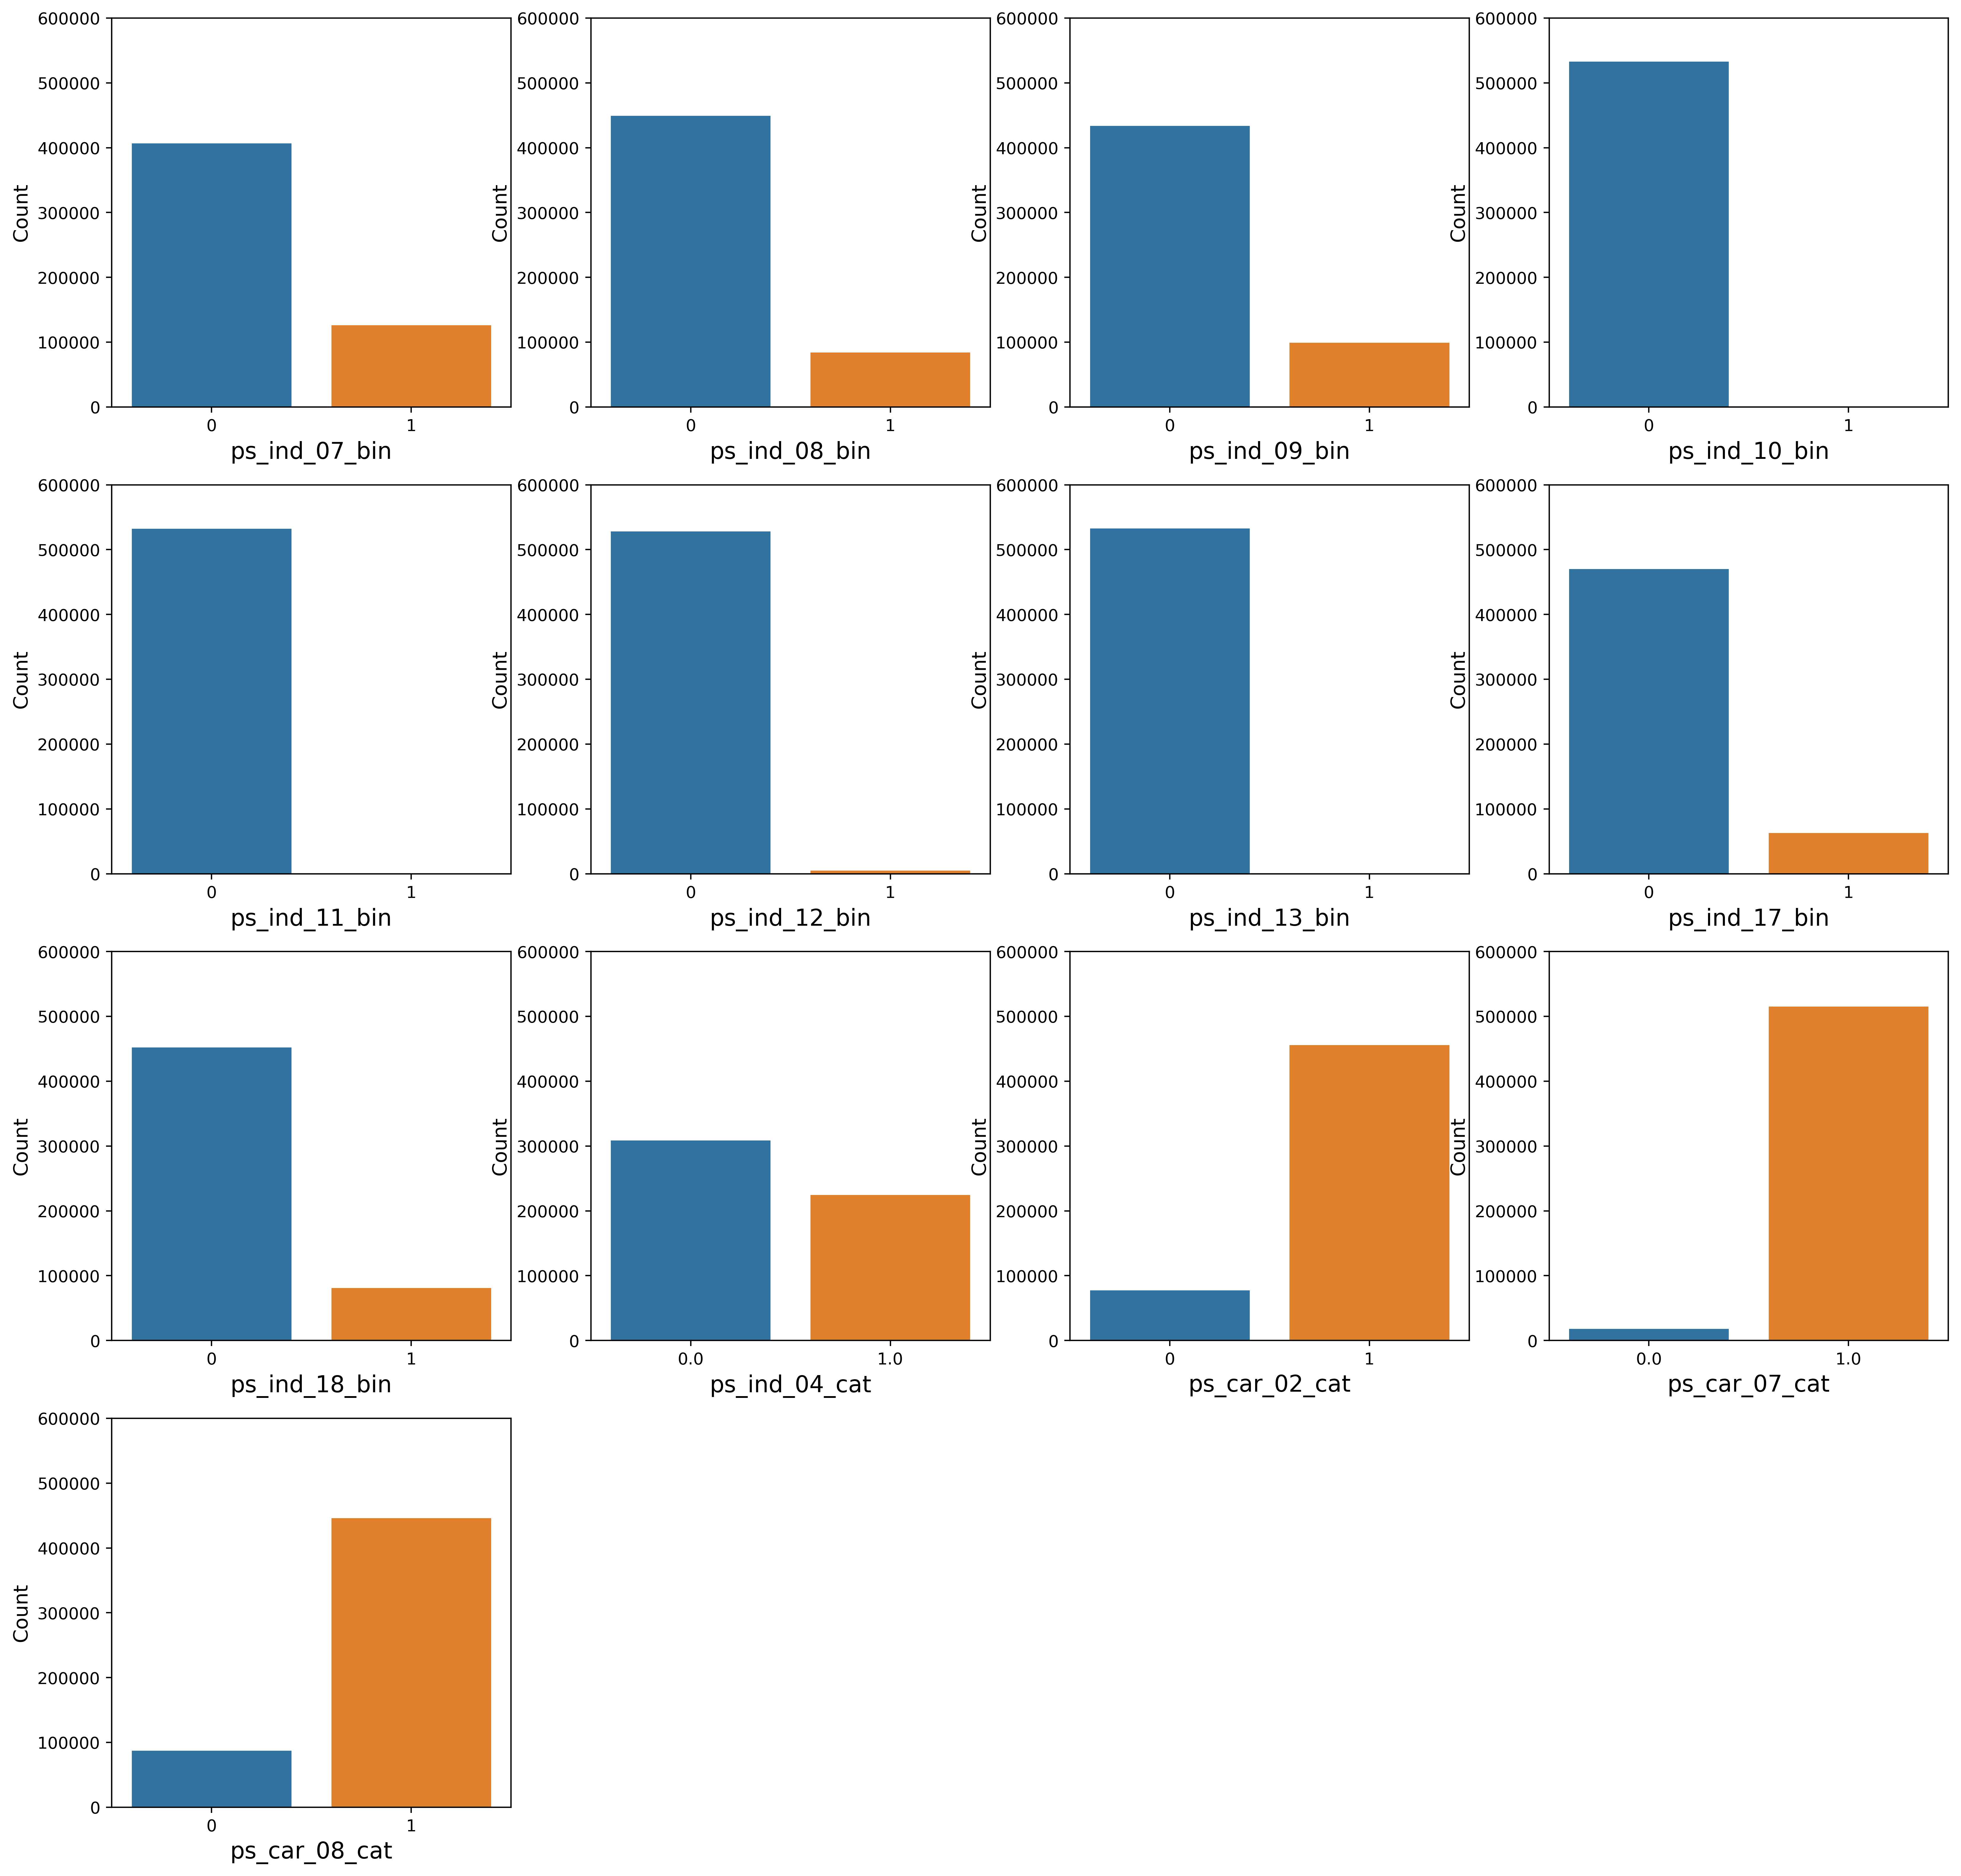

In [31]:
# Visualize binary features data and categorical features data (for styling, plot only features with 2 unique values)
plt.figure(figsize=(20, 20), dpi = 400)
count = 0

for f in (feature_bin + feature_cat):
    if  df_train[f].nunique() <= 2:
        ax = plt.subplot(4, 4, count+1)
        sns.countplot(df_train[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylabel("Count", fontsize = 12)
        plt.ylim(0, 600000)
        count += 1
        
plt.savefig('distribution.jpg')
plt.show()

### Exploratory Data Analysis

### 1.	Write at least 3 important inferences from the data above 

•	Target is imbalanced

•	4 types of columns (Category, Binary, Ordinal, Interval)

•	Outliers - There are few outliers in the data, removed those to have better predictions

•	Null values - Many features have null values in form of -1 so replaced with suitable values (Mode/Mean)

•	6 variables have too low variance.

- There are 57 distinct features (apart from id and target columns).This is a very reasonable amount of features considering the size of dataset. We may hardly face the curse of dimensionality.
- There 33 Categorical features out of which there are 18 Binary features so actual Categorical features are 15.

- Analyzed the correlations of all remaining features, drop redundant features.
- There are 12 features which are having missing values in dataset.
- There are few missing values in some features, but Features <b>'ps_car_03_cat'</b> and <b>'ps_car_05_cat'</b> have more than 40% data missing, so we have dropped them.
- Replaced the missing data in the remaining features:
- For binary features (bin) and categorical features (cat), replace missing data with the <b>most frequent value (Mode)</b> of the feature For other features (continuous or ordinal), replace missing data with <b>mean</b> value of the feature
- Features with <b>calc</b> in their names show little correlation with any other features in the training dataset. For dimensionality reduction, we should drop these features also.

- Now I will covert categorical features to dummy variables (one-hot encoding). One thing to note is that feature 'ps_car_11_cat' has 104 unique values.

- Target feature is not balanced class 0 is only 3.64% of total value.
- Mostly we prefer upsampling/downsampling in case of class imbalance.

### Data Preparation
#### Before applying machine learning algorithms, I should conduct feature standardization (z-score normalization).

### Variance Analysis

In [32]:
#Removing low variance variables from the dataframe

#Checking the number of low variance variables in the data using VarianceThreshold from sklearn feature_selection 


selector = VarianceThreshold(threshold=.01)
selector.fit(df_train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = df_train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('\nThese variables are {}'.format(list(v)))

7 variables have too low variance.

These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14']


In [33]:
#Dropping the low variance variables from the data and checking the shape of the final dataframe

print('\nShape of df before removal of low variance rows: ',df_train.shape)

df_train = df_train.drop(list(v), axis = 1)

print('Shape of df after removal of low variance rows: ',df_train.shape)


Shape of df before removal of low variance rows:  (533000, 34)
Shape of df after removal of low variance rows:  (533000, 27)


### Scaling the features

In [34]:
# standardization of non categorical features
feature_non_cat = [f for f in df_train.columns if (f.endswith('cat') != True) & (f not in ['id', 'target'])]
scaler = StandardScaler()

train_X = df_train.drop(['target', 'id'], axis=1)
train_y = df_train['target']
#X_valid = test.drop('id', axis=1)

train_X.loc[:, feature_non_cat] = scaler.fit_transform(train_X[feature_non_cat])
#X_valid.loc[:, feature_non_cat] = scaler.transform(X_valid[feature_non_cat])

Now I will covert categorical features to dummy variables (one-hot encoding). One thing to note is that feature 'ps_car_11_cat' has 104 unique values.

In [35]:
print(df_train['ps_car_11_cat'].unique())

[ 12  19  60 104  82  99  30  68  20  36 101 103  59  43  64  29  95   5
  28  87  66  10  26  54  32  38  83  89  49  93   1  22  85  78  31  34
   7   8   3  46  27  25  61  16  69  40  76  39  88  75  91  23  80  92
  72  86  90  62  33  67  73  77  42  21  74  37  44  48  70  13  15 102
  53  65 100  51  79  52  63   6  57  98  56  71  94  97  55  84  50   9
  17  41  11  45  14  96  24   2  18  35  81  47   4  58]


Because of the amount of categorical feature 'ps_car_11_cat' and other features have, the next step (coverting to dummy variables) will use about 2.2 GB memory and produce sparse matrix. Although executing the next cell is not very time-consuming, sometimes I run out of memory if I have many other applications running on my computer.

In [36]:
feature_bin = [f for f in df_train.columns if f.endswith('bin')] 
feature_cat1 = [f for f in df_train.columns if f.endswith('cat') and f!='ps_car_11_cat'] 

### Implement Hot Encoding for categorical features
- except <b>ps_car_11_cat</b>, as it has many values

In [37]:
# covert categorical features to dummy variables
train_num = df_train.shape[0]
print(feature_cat)
#dataset = pd.concat([X_train, X_valid], axis=0)   
dataset = pd.get_dummies(columns=feature_cat1, data=train_X)

train_X = dataset[:train_num]
#X_valid = dataset[train_num:]
print(train_X.shape)
#print(X_valid.shape)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
(533000, 79)


### Feature Selection (Random Forest Classifier)
Wow, now we have dataframes with 190+ columns (features), let's use random forest classifier to select 20 most important features contributing to a claim to be filed (target = 1). For the random forest classifier part here, I referenced codes from Prof. Ravi Shroff 's Machine Learning class at CUSP.

In [39]:
X1 = train_X
y1 = train_y
print(train_X.shape)
print(train_y.shape)

print(X1.shape)
print(y1.shape)

(533000, 79)
(533000,)
(533000, 79)
(533000,)


In [40]:
# split training dataset to random training and testing dataset for validation later
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, train_size = 0.7, random_state=42)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(373100, 79)
(373100,)
(159900, 79)
(159900,)


In [43]:
import warnings
warnings.filterwarnings("ignore")

### F1, Accuracy, Precision and Recall Scores in normal conditions (without scaling and other techniques)

In [42]:
# train the model with 50 trees, 4 parallel processes, and 10 minimum samples to split a node 
num_trees = 50
rf1 = RandomForestClassifier(n_estimators=num_trees, n_jobs=4, min_samples_split=10, verbose=2, oob_score = True)
rf1.fit(X=X_train, y=y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   37.5s


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   51.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=True, random_state=None, verbose=2,
                       warm_start=False)

In [44]:
# generate predictions on test datasets (which is a random subset split from the training set)
rf1_predictions = rf1.predict_proba(X_test)[:, 1]

# get AUC score (produce probabilistic predictions)
print('roc_auc_score: ',roc_auc_score(y_test, rf1_predictions))

# get accuracy score (predict the class)
rf1predictions_class = rf1.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, rf1predictions_class, normalize=True))
print(confusion_matrix(y_test, rf1predictions_class))
print('precision_score',precision_score(y_test, rf1predictions_class))
print('recall_score',recall_score(y_test, rf1predictions_class))
print('f1_score: ',f1_score(y_test, rf1predictions_class))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.7s finished


roc_auc_score:  0.5839937589861897


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.6s finished


accuracy_score:  0.9657848655409631
[[154428      0]
 [  5471      1]]
precision_score 1.0
recall_score 0.0001827485380116959
f1_score:  0.00036543029417138677


In [45]:
# select 20 most important features 
# print out and store the 20 features' names and their importances to a dataframe 'df_feature_select20'
feature_names = list(X_test.columns.values)
feature_importances = list(rf1.feature_importances_)
feature_list = []

for i in range(0,len(feature_names)):
    feature_list.append((feature_names[i], feature_importances[i]))
    
df_feature_select20 = pd.DataFrame(sorted(feature_list, reverse=True, key=lambda x: x[1])[:20])
df_feature_select20.columns = ['feature_select', 'feature_importance']
print(df_feature_select20)

        feature_select  feature_importance
0            ps_car_13            0.146635
1            ps_reg_03            0.133214
2        ps_car_11_cat            0.069166
3            ps_ind_03            0.065777
4            ps_ind_15            0.065376
5            ps_reg_02            0.059662
6            ps_reg_01            0.047100
7            ps_ind_01            0.045259
8            ps_car_11            0.019312
9        ps_ind_18_bin            0.010443
10     ps_car_06_cat_0            0.010281
11     ps_car_06_cat_1            0.010213
12   ps_car_09_cat_2.0            0.009903
13    ps_car_06_cat_11            0.009890
14       ps_ind_08_bin            0.009677
15       ps_ind_07_bin            0.009641
16       ps_ind_09_bin            0.009632
17   ps_ind_02_cat_1.0            0.009570
18  ps_car_01_cat_11.0            0.009486
19    ps_car_06_cat_14            0.009021


In [46]:
# slice datasets to contain information on only these 20 features
X_train_select20 = X_train[df_feature_select20['feature_select']]
#X_valid_select20 = X_valid[df_feature_select20['feature_select']]
X_test_select20 = X_test[df_feature_select20['feature_select']]

### Train A Model (Logistic Regression)
Let's train a model learning from data on data of these selected featues. Here I only used logistic regression model, many more other algorithms can be implemented.

In [47]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# calculate regression score to test over fitting

In [48]:
print(lr.score(X_train, y_train) , lr.score(X_test, y_test))
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print('precision_score',precision_score(y_test, y_pred_lr))
print('recall_score',recall_score(y_test, y_pred_lr))
print('f1_score: ', f1_score(y_test, y_pred_lr))

0.9663066202090592 0.9657786116322702
Accuracy:  0.9657786116322702
[[154428      0]
 [  5472      0]]
precision_score 0.0
recall_score 0.0
f1_score:  0.0


In [49]:
lr1 = LogisticRegression()
lr1.fit(X_train_select20, y_train)
y_pred_lr1 = lr1.predict(X_test_select20)
# calculate regression score to test over fitting

In [50]:
print('Accuracy: ', accuracy_score(y_test, y_pred_lr1))
print('precision_score',precision_score(y_test, y_pred_lr1))
print('recall_score',recall_score(y_test, y_pred_lr1))
print('f1_score: ', f1_score(y_test, y_pred_lr1))

Accuracy:  0.9657786116322702
precision_score 0.0
recall_score 0.0
f1_score:  0.0


### The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

- Simple Logistic Regression Model seems to high accuracy but Logistic regression is a linear model, so it may not work well on non-linear cases. In terms of model complexity, logistic regression has high bias and low variance. So, it might work well if you handle the outliers well but after model deployment, we cannot rely on the predictions because of the high bias and low variance characteristics of Logistic Regression. 
- For logistic regressions, accuracy is not the main measure. We must use other scores like f1, roc-auc, precision and recall. These are not up to the mark for above modelling.

### Why do you think f1-score is 0.0?
- The f1 score is comprised of precision and recall. If precision and recall both are good then only the f1 score will be good.
- The f1 score reaches the best value, meaning perfect precision and recall, at a value of 1. The worst f1 score, which means lowest precision and lowest recall, would be a value of 0.
- f1 score is 0, which means either precision or recall is 0 or both.

### F1, Accuracy, Precision and Recall Scores in normal conditions (with scaling and SMOTE)

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smt = SMOTE()

In [53]:
y_train.value_counts()

0    360529
1     12571
Name: target, dtype: int64

In [54]:
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [55]:
print(X_train_smt.shape)
print(y_train_smt.shape)

(721058, 79)
(721058,)


In [56]:
y_train_smt.value_counts()

1    360529
0    360529
Name: target, dtype: int64

#### How many training records are there after achieving a balance of 12%? 
- To obtain a balance between majority and minority class, we used sampling techniques. After getting balance of 12% from ~ 3%, there are there are 403793 rows in which 360529 are 0s and 43264 are 1s

In [57]:
num_trees = 50
rf1 = RandomForestClassifier(n_estimators=num_trees, n_jobs=4, min_samples_split=10, verbose=2, oob_score = True)
rf1.fit(X=X_train_smt, y=y_train_smt)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50


building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   54.3s


building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=True, random_state=None, verbose=2,
                       warm_start=False)

In [56]:
# generate predictions on test datasets (which is a random subset split from the training set)
rf1_predictions = rf1.predict_proba(X_test)[:, 1]

# get AUC score (produce probabilistic predictions)
print('roc_auc_score: ',roc_auc_score(y_test, rf1_predictions))

# get accuracy score (predict the class)
rf1predictions_class = rf1.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, rf1predictions_class, normalize=True))
print(confusion_matrix(y_test, rf1predictions_class))
print('precision_score',precision_score(y_test, rf1predictions_class))
print('recall_score',recall_score(y_test, rf1predictions_class))
print('f1_score: ',f1_score(y_test, rf1predictions_class))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished


roc_auc_score:  0.5752064823694973


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.3s finished


accuracy_score:  0.965709818636648
precision_score 0.23809523809523808
recall_score 0.0009137426900584795
f1_score:  0.0018204988166757691
Conf Matrix  [[154412     16]
 [  5467      5]]


In [58]:
lr = LogisticRegression()
lr.fit(X_train_smt, y_train_smt)
y_pred_lr = lr.predict(X_test)

In [60]:
print(lr.score(X_train_smt, y_train_smt) , lr.score(X_test, y_test))
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('precision_score',precision_score(y_test, y_pred_lr))
print('recall_score',recall_score(y_test, y_pred_lr))
print('f1_score: ', f1_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

0.925227928959945 0.9544590368980613
Accuracy:  0.9544590368980613
precision_score 0.0475
recall_score 0.017361111111111112
f1_score:  0.025428265524625265
[[152523   1905]
 [  5377     95]]


In [61]:
max_iterations = [100,200,250]
penalty = ['l1','l2']
C = np.logspace(-2, 2, 10)

In [62]:
parameters = dict(penalty= penalty , C= C, max_iter= max_iterations)
grid_LR = GridSearchCV(estimator = lr , param_grid = parameters)
grid_result = grid_LR.fit(X_train,y_train)
grid_result.best_score_,grid_result.best_params_

(0.9663066202090592, {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'})

In [63]:
lr_hpt = LogisticRegression(max_iter=100 , penalty = 'l2' , C = 0.01)
logistic_model = lr_hpt.fit(X_train_smt, y_train_smt)

In [64]:
predictions_LR_HPT = logistic_model.predict(X_test)

print('Confusion Matrix Logistic Regression after hyperparameter tuning is : \n')
print(confusion_matrix(y_test,predictions_LR_HPT))
print('Accuracy: ', accuracy_score(y_test, predictions_LR_HPT))
print('precision_score',precision_score(y_test, predictions_LR_HPT))
print('recall_score',recall_score(y_test, predictions_LR_HPT))
print(f1_score(y_test,predictions_LR_HPT))

Confusion Matrix Logistic Regression after hyperparameter tuning is : 

[[152096   2332]
 [  5366    106]]
Accuracy:  0.9518574108818011
precision_score 0.043478260869565216
recall_score 0.019371345029239765
0.026801517067003795


In [72]:
predictions_LR_HPT = logistic_model.predict(X_test)

print('Confusion Matrix Logistic Regression after hyperparameter tuning is : \n')
print(confusion_matrix(y_test,predictions_LR_HPT))
print('Accuracy: ', accuracy_score(y_test, predictions_LR_HPT))
print('precision_score',precision_score(y_test, predictions_LR_HPT))
print('recall_score',recall_score(y_test, predictions_LR_HPT))
print(f1_score(y_test,predictions_LR_HPT))

Confusion Matrix Logistic Regression after hyperparameter tuning is : 

[[151954   2474]
 [  5344    128]]
Accuracy:  0.9511069418386492
precision_score 0.04919292851652575
recall_score 0.023391812865497075
0.03170671290562299


In [65]:
clf_RF = RandomForestClassifier(n_estimators=50, class_weight="balanced")
clf_RF.fit(X_train_smt,y_train_smt)
predictions_RF = clf_RF.predict(X_test)


print('Confusion matrix of RandomForest Classifier is: \n')
print(confusion_matrix(y_test,predictions_RF))
print('precision_score',precision_score(y_test, predictions_RF))
print('recall_score',recall_score(y_test, predictions_RF))
print(f1_score(y_test,predictions_RF))

Confusion matrix of RandomForest Classifier is: 

[[154395     33]
 [  5468      4]]
precision_score 0.10810810810810811
recall_score 0.0007309941520467836
0.0014521691777092032


### What is the precision and recall score for the model?
- I have opted for Random Forest Classifier. So, the precision and recall score for my model are not good. These are around 0.3 and 0.001 respectively. 

### What is the most important inference you can draw from the result?
- The Recall value is too low, which means the model is not able to pick true positives correctly

### Why do you think f1-score has improved?
- f1-score improved from logistic regression to other models because for logistic regression to perform well, the dataset should be lineraly seperable. If the dataset is large, it is very difficult to present the data to the model in a linealy seperable way. There are more complex algorithms such as Random Forest Classifiers, XGBclassifier which use ensemble modelling for classification. These models outperform Logistic regression because they are implemented using decision tress. 
-  The Sampling also played a crucial role in improving the results even in classic Logistic Regressions.

## Linear Support Vector Classifier - (dual = True and max_iter = 500)

In [66]:
clf_LSVC_1 = LinearSVC(dual = True , max_iter = 500)
clf_LSVC_1.fit(X_train_smt , y_train_smt)

predictions_LSVC_1 = clf_LSVC_1.predict(X_test)

print('Confusion Matrix Linear Support Vector Classifier is: \n')
print(confusion_matrix(y_test,predictions_LSVC_1))
print(f1_score(y_test,predictions_LSVC_1))

Confusion Matrix Linear Support Vector Classifier is: 

[[154427      1]
 [  5472      0]]
0.0


## Linear Support Vector Classifier - (dual = False and max_iter = 1000)

In [67]:
clf_LSVC_2 = LinearSVC(dual = False , max_iter = 2000)
clf_LSVC_2.fit(X_train_smt , y_train_smt)

predictions_LSVC_2 = clf_LSVC_2.predict(X_test)

print('Confusion Matrix Linear Support Vector Classifier is: \n')
print(confusion_matrix(y_test,predictions_LSVC_2))
print(f1_score(y_test,predictions_LSVC_2))

Confusion Matrix Linear Support Vector Classifier is: 

[[154428      0]
 [  5472      0]]
0.0


### For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement.
- I dint see any improvement in LinearSVC with parameter like dual, max_iter

## XGBoost Classifier

In [68]:
clf_XGB = XGBClassifier()
clf_XGB.fit(X_train_smt , y_train_smt)

predictions_XGB = clf_XGB.predict(X_test)

print('Confusion Matrix XGBClassifier is: \n')
print(confusion_matrix(y_test,predictions_XGB))
print(f1_score(y_test,predictions_XGB))

Confusion Matrix XGBClassifier is: 

[[153630    798]
 [  5423     49]]
0.015508783035290394


## SVM with Only 100k records

In [69]:
X1.shape

(533000, 79)

In [70]:
y1.shape

(533000,)

In [71]:
train_X_SVC10 = X1[:100000]
train_y_SVC10 = y1[:100000]

print(train_X_SVC10.shape)
print(train_y_SVC10.shape)

(100000, 79)
(100000,)


In [72]:
X_train_SVC10, X_test_SVC10, y_train_SVC10, y_test_SVC10 = train_test_split(train_X_SVC10,
                                                    train_y_SVC10, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [73]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X1, y1, train_size = 0.7, random_state=42)

In [74]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_pca)

In [75]:
X_test_pca = pca.transform(X_test_pca)

In [77]:
print(X_train_pca.shape)
print(y_train_pca.shape)
print(y_train_pca.value_counts())

(373100, 5)
(373100,)
0    360529
1     12571
Name: target, dtype: int64


In [78]:
X_train_pca_smt, y_train_pca_smt = smt.fit_sample(X_train_pca, y_train_pca)

In [79]:
print(X_train_pca_smt.shape)
print(y_train_pca_smt.shape)
print(y_train_pca_smt.value_counts())

(721058, 5)
(721058,)
1    360529
0    360529
Name: target, dtype: int64


### SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?
- The precision and recall scores for the target value ‘1’ became zero which implies the recall of the model is not good. This might be because of the huge difference between the number of 0’s and 1’s in the target column.

### XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason? 
F1-score is not low for my model. Instead Gradient Boosting gives low f1-scores

• Overfitting

• Improper Hyperparameter tuning

Gradient Boosting trees build one tree at a time and each newly added tree helps to correct errors made by previously trained tree. There are typically three parameters – number of trees, depth of tree and learning rate. Gradient boosting trees are more prone to overfitting since it requires a lot of hyperparameter tuning.


###  What is the increase in number of features after one-hot encoding of the data?
The number of features increased from 27 to 79. So, the increase is 52.

### 	Is there any improvement in scores after encoding?
Yes, There was significant improvement after encoding.

### If not missing a positive sample is the priority which model is best so far?
The model with the highest true positive score can be used. In this case, Linear Vector Classifier with hyperparameters dual = False and max_iter = 1000 should be used.

### Do you think using AdaBoost can give any significant improvement over XGBoost?
There will be a significant improvement but XG boost performs better than Adaboost in most of the cases as it can handle large amounts of data.

## Multi Layer Perceptron Classifier

In [80]:
clf_grid = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, learning_rate= 'constant',
                     solver='adam', verbose=10, activation= 'tanh', random_state=42)

In [81]:
clf_grid.fit(X_train_pca_smt, y_train_pca_smt)

Iteration 1, loss = 0.68070782
Iteration 2, loss = 0.67459160
Iteration 3, loss = 0.66994366
Iteration 4, loss = 0.66492942
Iteration 5, loss = 0.65940632
Iteration 6, loss = 0.65398906
Iteration 7, loss = 0.64869410
Iteration 8, loss = 0.64360430
Iteration 9, loss = 0.63849043
Iteration 10, loss = 0.63360844
Iteration 11, loss = 0.62885777
Iteration 12, loss = 0.62421793
Iteration 13, loss = 0.61970514
Iteration 14, loss = 0.61552008
Iteration 15, loss = 0.61185434
Iteration 16, loss = 0.60806464
Iteration 17, loss = 0.60447773
Iteration 18, loss = 0.60112278
Iteration 19, loss = 0.59801820
Iteration 20, loss = 0.59501785
Iteration 21, loss = 0.59209786
Iteration 22, loss = 0.58934206
Iteration 23, loss = 0.58646835
Iteration 24, loss = 0.58425247
Iteration 25, loss = 0.58145540
Iteration 26, loss = 0.57966354
Iteration 27, loss = 0.57740498
Iteration 28, loss = 0.57528973
Iteration 29, loss = 0.57347873
Iteration 30, loss = 0.57178622
Iteration 31, loss = 0.56980875
Iteration 32, los

Iteration 253, loss = 0.48400343
Iteration 254, loss = 0.48402058
Iteration 255, loss = 0.48366319
Iteration 256, loss = 0.48400887
Iteration 257, loss = 0.48392260
Iteration 258, loss = 0.48377250
Iteration 259, loss = 0.48360973
Iteration 260, loss = 0.48306507
Iteration 261, loss = 0.48339190
Iteration 262, loss = 0.48314145
Iteration 263, loss = 0.48321288
Iteration 264, loss = 0.48324484
Iteration 265, loss = 0.48334548
Iteration 266, loss = 0.48302996
Iteration 267, loss = 0.48283774
Iteration 268, loss = 0.48262547
Iteration 269, loss = 0.48262357
Iteration 270, loss = 0.48277926
Iteration 271, loss = 0.48266781
Iteration 272, loss = 0.48252749
Iteration 273, loss = 0.48264644
Iteration 274, loss = 0.48248247
Iteration 275, loss = 0.48241167
Iteration 276, loss = 0.48194434
Iteration 277, loss = 0.48218247
Iteration 278, loss = 0.48198377
Iteration 279, loss = 0.48208842
Iteration 280, loss = 0.48189179
Iteration 281, loss = 0.48219653
Iteration 282, loss = 0.48184158
Iteration 

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [82]:
y_pred5 = clf_grid.predict(X_test_pca)

In [83]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred5))
print(confusion_matrix(y_test_pca, y_pred5))
print('precision_score',precision_score(y_test_pca, y_pred5))
print('recall_score',recall_score(y_test_pca, y_pred5))
print('f1_score',f1_score(y_test_pca, y_pred5))

accuracy_score:  0.6895809881175735
[[108426  46002]
 [  3634   1838]]
precision_score 0.03841973244147157
recall_score 0.3358918128654971
f1_score 0.06895258103241297


In [84]:
print(classification_report(y_test_pca, y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81    154428
           1       0.04      0.34      0.07      5472

    accuracy                           0.69    159900
   macro avg       0.50      0.52      0.44    159900
weighted avg       0.94      0.69      0.79    159900



#### Parameter tuning for MLPClassifier

In [ ]:
hidden_layer_sizes = [[20] , [40,20] , [40,20,10]]
activation = ['logistic' , 'relu']
param_grid = dict(hidden_layer_sizes = hidden_layer_sizes , activation  = activation , batch_size = [10000,15000])
grid = GridSearchCV(estimator = clf_MLP , param_grid = param_grid)

In [ ]:
grid_result = grid.fit(X_train,y_train)

In [ ]:
grid_result.best_score_,grid_result.best_params_

#### Using the best parameters for doing the classification using MLP

In [88]:
clf_grid1 = MLPClassifier(hidden_layer_sizes=[20], batch_size=10000, max_iter=500, alpha=0.0001, learning_rate= 'constant',
                     solver='adam', verbose=10, activation= 'logistic', random_state=42)

In [89]:
clf_grid1.fit(X_train_pca_smt, y_train_pca_smt)

Iteration 1, loss = 0.69757360
Iteration 2, loss = 0.68855083
Iteration 3, loss = 0.68400080
Iteration 4, loss = 0.68218773
Iteration 5, loss = 0.68190012
Iteration 6, loss = 0.68174056
Iteration 7, loss = 0.68154233
Iteration 8, loss = 0.68137933
Iteration 9, loss = 0.68112551
Iteration 10, loss = 0.68083899
Iteration 11, loss = 0.68056228
Iteration 12, loss = 0.68027279
Iteration 13, loss = 0.67995812
Iteration 14, loss = 0.67966525
Iteration 15, loss = 0.67938428
Iteration 16, loss = 0.67921065
Iteration 17, loss = 0.67891677
Iteration 18, loss = 0.67872647
Iteration 19, loss = 0.67856237
Iteration 20, loss = 0.67845192
Iteration 21, loss = 0.67829969
Iteration 22, loss = 0.67821180
Iteration 23, loss = 0.67810933
Iteration 24, loss = 0.67802712
Iteration 25, loss = 0.67796966
Iteration 26, loss = 0.67790993
Iteration 27, loss = 0.67783953
Iteration 28, loss = 0.67779035
Iteration 29, loss = 0.67770800
Iteration 30, loss = 0.67767238
Iteration 31, loss = 0.67760634
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10000, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[20], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [90]:
y_pred6 = clf_grid1.predict(X_test_pca)

In [91]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred6))
print(confusion_matrix(y_test_pca, y_pred6))
print('precision_score',precision_score(y_test_pca, y_pred6))
print('recall_score',recall_score(y_test_pca, y_pred6))
print('f1_score',f1_score(y_test_pca, y_pred6))

accuracy_score:  0.5479111944965603
[[84421 70007]
 [ 2282  3190]]
precision_score 0.04358102108009891
recall_score 0.58296783625731
f1_score 0.08109928942785596


In [92]:
clf_grid2 = MLPClassifier(hidden_layer_sizes=[20], batch_size=10000, max_iter=500, alpha=0.0001, 
                          learning_rate= 'constant', solver='adam', verbose=10, activation= 'tanh', random_state=42)

In [93]:
clf_grid2.fit(X_train_pca_smt, y_train_pca_smt)

Iteration 1, loss = 0.79976604
Iteration 2, loss = 0.70562195
Iteration 3, loss = 0.69009263
Iteration 4, loss = 0.68609541
Iteration 5, loss = 0.68453856
Iteration 6, loss = 0.68359318
Iteration 7, loss = 0.68301009
Iteration 8, loss = 0.68267061
Iteration 9, loss = 0.68235825
Iteration 10, loss = 0.68208628
Iteration 11, loss = 0.68186794
Iteration 12, loss = 0.68169240
Iteration 13, loss = 0.68152745
Iteration 14, loss = 0.68134812
Iteration 15, loss = 0.68119643
Iteration 16, loss = 0.68108445
Iteration 17, loss = 0.68084109
Iteration 18, loss = 0.68056602
Iteration 19, loss = 0.68018394
Iteration 20, loss = 0.67984757
Iteration 21, loss = 0.67943363
Iteration 22, loss = 0.67913003
Iteration 23, loss = 0.67883518
Iteration 24, loss = 0.67857322
Iteration 25, loss = 0.67834287
Iteration 26, loss = 0.67812675
Iteration 27, loss = 0.67794705
Iteration 28, loss = 0.67783458
Iteration 29, loss = 0.67760973
Iteration 30, loss = 0.67746536
Iteration 31, loss = 0.67730709
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=10000, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[20], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [94]:
y_pred7 = clf_grid2.predict(X_test_pca)

In [95]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred7))
print(confusion_matrix(y_test_pca, y_pred7))
print('precision_score',precision_score(y_test_pca, y_pred7))
print('recall_score',recall_score(y_test_pca, y_pred7))
print('f1_score',f1_score(y_test_pca, y_pred7))

accuracy_score:  0.5354346466541589
[[82450 71978]
 [ 2306  3166]]
precision_score 0.04213243905035665
recall_score 0.5785818713450293
f1_score 0.07854520194502332


In [101]:
clf_grid3 = MLPClassifier(hidden_layer_sizes=[20], batch_size=1000, max_iter=1000, alpha=0.001, learning_rate= 'adaptive',
                     solver='adam', verbose=10, activation= 'tanh', random_state=42)

In [102]:
clf_grid2.fit(X_train_pca_smt, y_train_pca_smt)

Iteration 1, loss = 0.79976604
Iteration 2, loss = 0.70562195
Iteration 3, loss = 0.69009263
Iteration 4, loss = 0.68609541
Iteration 5, loss = 0.68453856
Iteration 6, loss = 0.68359318
Iteration 7, loss = 0.68301009
Iteration 8, loss = 0.68267061
Iteration 9, loss = 0.68235825
Iteration 10, loss = 0.68208628
Iteration 11, loss = 0.68186794
Iteration 12, loss = 0.68169240
Iteration 13, loss = 0.68152745
Iteration 14, loss = 0.68134812
Iteration 15, loss = 0.68119643
Iteration 16, loss = 0.68108445
Iteration 17, loss = 0.68084109
Iteration 18, loss = 0.68056602
Iteration 19, loss = 0.68018394
Iteration 20, loss = 0.67984757
Iteration 21, loss = 0.67943363
Iteration 22, loss = 0.67913003
Iteration 23, loss = 0.67883518
Iteration 24, loss = 0.67857322
Iteration 25, loss = 0.67834287
Iteration 26, loss = 0.67812675
Iteration 27, loss = 0.67794705
Iteration 28, loss = 0.67783458
Iteration 29, loss = 0.67760973
Iteration 30, loss = 0.67746536
Iteration 31, loss = 0.67730709
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=10000, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[20], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [105]:
y_pred8 = clf_grid2.predict(X_test_pca)

In [106]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred8))
print(confusion_matrix(y_test_pca, y_pred8))
print('precision_score',precision_score(y_test_pca, y_pred8))
print('recall_score',recall_score(y_test_pca, y_pred8))
print('f1_score',f1_score(y_test_pca, y_pred8))

accuracy_score:  0.5354346466541589
[[82450 71978]
 [ 2306  3166]]
precision_score 0.04213243905035665
recall_score 0.5785818713450293
f1_score 0.07854520194502332


### MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?
We can use GridSearchCV, RandomizedSearchCV ,etc.. to find the best parameters for the MLP classifier. But if the dataset is large, it takes a lot of time (if you have less computational power) to get the best parameters.

### At what layer size we get the best f1-score?
At one hidden layer with a size of 20 neurons , I got the best f1 score.